# Assignment 10

In [1]:
import numpy as np
np.set_printoptions(threshold=10) # printing setup
import matplotlib.pyplot as plt

In [2]:
# This formula shall be imitated by the neural network
def formula_1(x):
    return x + 0.75

# This formula shall be imitated by the neural network, too
def formula_2(x):
    return(np.sin(x) + 0.5)

In [3]:
# Input data
X = np.random.uniform(low=-0.5, high=1.55, size=100)# make 100 uniformly distributed samples
X = X.reshape(-1, 1) # -1 indicates "as many rows as required"
X # input data as column vector

array([[1.2822357 ],
       [0.61593568],
       [0.99596013],
       ...,
       [1.5370429 ],
       [1.27354975],
       [0.48213468]])

In [4]:
# Target values with formula_1
y_1 = np.array([formula_1(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_1 = y_1.reshape(-1, 1)
y_1 # target data as column vector

array([[2.0322357 ],
       [1.36593568],
       [1.74596013],
       ...,
       [2.2870429 ],
       [2.02354975],
       [1.23213468]])

In [5]:
# Target values with formula_2
y_2 = np.array([formula_2(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_2 = y_2.reshape(-1, 1)
y_2 # target data as column vector

array([[1.45865448],
       [1.07772251],
       [1.33928137],
       ...,
       [1.49943041],
       [1.45614656],
       [0.96367157]])

### Code below contains the parts to be edited

Imitation of formula 'x+0.75'
Weight_1:1.0068740368359326
Weight_2:1.0467507623257297
Bias:1.0499010795315427


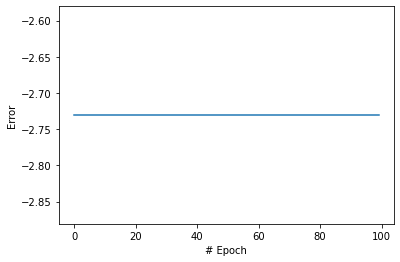

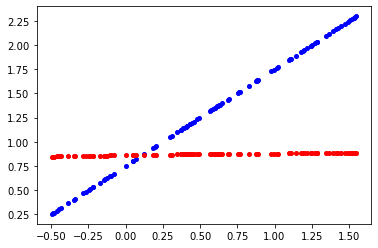


Imitation of formula 'sin(x)+0.5'
Weight_1:1.0041570942736273
Weight_2:1.0114323900757294
Bias:1.0077964067109213


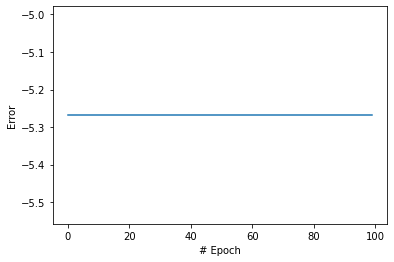

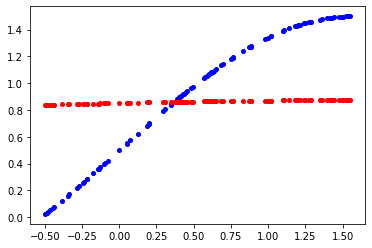

In [62]:
# Simple neural-network based regressor
class NeuralNetwork:
    
    # Function called at object initialization
    def __init__(self):
        
        # These are members of the class. You can access them in every method by "self.var_name" and from outside the class with "instance_name.var_name"
        
        # Sample to compute pass with
        self.X          = 0.0 # set me!
        self.y          = 0.0 # set me!
        
        # Parameters to be learned
        self.weight_1   = 1.0 # teach me!
        self.weight_2   = 1.0 # teach me!
        self.bias       = 1.0 # teach me!
        
        # State information
        self.hidden     = 0.0 # use me!
        self.output     = 0.0 # use me!
        self.error      = 0.0 # use me!
        
    # Set sample to be used in feed-forward and back-propagation pass
    def set_sample(self, X, y):
        self.X = float(X)
        self.y = float(y)
        
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    
    
    # (a) Feed-forward pass
    def feed_forward(self):
        weights_hidden = np.array([self.weight_1, self.bias])
        weights_output = np.array([self.weight_2, self.bias])
        self.X = np.array([self.X, 1])
        hidden_transformation = np.dot(weights_hidden.T, self.X)
        self.hidden = 1 / (1 + np.exp(-hidden_transformation))
        self.hidden = np.array([self.hidden, 1])
        output_transformation = np.dot(weights_output.T, self.hidden)
        self.output = 1 / (1 + np.exp(-output_transformation))
        
        #print(self.output)
        
        # TODO: Feed-forward pass and error estimation, store results in state information members
        # Consider the loss function: 0.5 ∗ (𝑡𝑎𝑟𝑔𝑒𝑡 − 𝑜𝑢𝑡𝑝𝑢𝑡)2

         # remove this line, just here to produce no compile error in initial setup
      
    # (b) Back-propagation pass
    def back_prop(self):
        weights_hidden = np.array([self.weight_1, self.bias])
        weights_output = np.array([self.weight_2, self.bias])
        self.error = np.square(self.y - self.output) / 2
        error_output = -(self.y - self.output)  #derivative of error with respect to output
        output_outputLayer = np.multiply(self.output, (1-self.output)) #derivative of output with respect to output layer linear transformation
        outputLayer_hiddenWeight = self.hidden  #derivative of output layer linear transformation w.r.t to weight between hidden and output layer
        error_hiddenWeight = np.dot(outputLayer_hiddenWeight, (error_output * output_outputLayer).T)
        outputLayer_hiddenLayerActivation = weights_output
        hiddenLayerActive_hiddenLayerLinear = np.multiply(self.hidden, (1 - self.hidden))
        hiddenLayer_inputWeight = self.X
        error_inputWeight = np.dot(hiddenLayer_inputWeight, (hiddenLayerActive_hiddenLayerLinear * np.dot(outputLayer_hiddenLayerActivation,(output_outputLayer * error_output))).T)
        #print(error_inputWeight)
        learningRate = 0.01
        weights_output = weights_output - learningRate * error_hiddenWeight
        weights_hidden = weights_hidden - learningRate * error_inputWeight
        self.weight_1 = weights_hidden[0]
        self.weight_2 = weights_output[0]
        self.bias = weights_output[1]
        # TODO: Derivations of parameters
        # TODO: Update the parameters with learning rate of 0.01
        
def execute_nn(X, y):
    
    # Instantiate neural network
    nn = NeuralNetwork()
    
    # Collect mean error of each epoch to plot it later
    epoch_error = []

    # Perform multiple epochs, aka inputting the dataset multiple times
    for epoch in range(0,100):
        nn = NeuralNetwork() # instantiates neural network
        for i in range(0, X.shape[0]):
            nn.set_sample(X[i], y[i]) # sets sample with 2 as input and 5 as target
            nn.feed_forward() # perform feed-forward to calculate output
            nn.back_prop() # use difference between target and actual output to update parameters
        #Remember final error of each epoch in "epoch_error"
        epoch = np.average(nn.error)
        epoch_error.append(epoch)
        
        
    # Print final parameters of trained neural network
    print("Weight_1:"+ str(nn.weight_1))
    print("Weight_2:" + str(nn.weight_2))
    print("Bias:" + str(nn.bias))
    
    # Plot epoch errors with logarithmic transformation
    plt.plot(list(range(len(epoch_error))), np.log(epoch_error))
    ax = plt.gca()
    ax.set_xlabel('# Epoch')
    ax.set_ylabel('Error')
    plt.show()
    
    # Plot datapoints as originally transformed and as transformed by neural network
    computed = []
    for i in range(0, X.shape[0]):
        nn.set_sample(X[i], y[i])
        nn.feed_forward()
        computed.append(nn.output)
    plt.scatter(X.transpose().flatten(), y.transpose().flatten(), c='blue', s=16)
    plt.scatter(X.transpose().flatten(), computed, c='red', s=16)
    plt.show()

print("Imitation of formula 'x+0.75'")
execute_nn(X,y_1)
print()
print("Imitation of formula 'sin(x)+0.5'")
execute_nn(X,y_2)
